# Лабораторная работа 2, ПМИ 2024/25, I курс, М+, дискретная математика.
Это ноутбук с задачами, которые будут проверяться вручную. При решении задач можно использовать всю стандартную библиотеку Python, а также NetworkX, Matplotlib, numpy и их зависимости. Использование любых других сторонних библиотек запрещено.

При решении ноутбука вам потребуется писать доказательства. Убедительная просьба аккуратно оформлять математические выкладки:
- всё, что не является кодом, в ноутбуке должно быть в Markdown ячейках
- в Markdown можно писать $\LaTeX$-овские математические формулы:
  - однострочные: `$f(x_1, \dots, x_n) = \bigwedge_{i=1}^n x_i$`: $f(x_1, \dots, x_n) = \bigwedge_{i=1}^n x_i$
  - многострочные: `$$f(x_1, \dots, x_n) = \bigwedge_{i=1}^n x_i$$`: $$f(x_1, \dots, x_n) = \bigwedge_{i=1}^n x_i$$
  - упоминание любых математических объектов также желательно писать в `$...$`, даже если их названия однобуквенные, например:

> Функция $f$ непрерывна по переменной $x$ на множестве $A \subseteq \mathbb{R}^2$...
  
Пожалуйста, используйте эти возможности Jupyter Notebook. В этой работе не будет громоздких выкладок, поэтому их оформление не должно вызвать затруднений.
  
Удачи!

In [92]:
%pip install ipytest

75801.96s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

In [93]:
import ipytest
ipytest.autoconfig()

# Задание 1. Случайные раскраски графов (1.5 балла)
Вас уже давно мучает мысль, что ваш город — серый и унылый. Но сегодня пришло время это исправить! Вооружившись балончиками с красками, вы выходите из дома и полны решимости расцветить город.  

Город в котором вы живете — это простой неориентированный граф. Вы законопослушный гражданин, поэтому хотите, чтобы раскраска была как можно более _правильной_. Напомним, что раскраска вершин графа называется _правильной_, если никакие две одноцветные вершины не являются смежными.

В вашем распоряжении $n$ красок. Каждая вершина графа раскрашивается равновероятно в один из цветов.

_Задание_. Напишите функцию `random_coloring_impropriety`, которая генерирует случайную вершинную раскраску графа на $n$ цветах и возвращает _неправильность_ раскраски — количество ребер графа, у которых инцидентные им вершины раскрашены в одинковый цвет. Из опредедения следует, что раскраска правильная, если её неправильность равна нулю.

_Замечание_: обычно неправильностью раскраски называют другую величину, а именно максимум из неправильностей вершин. Неправильностью вершины называют число смежных с ней вершин того же цвета. Несложно понять, что в нашем определении неправильность — это полусумма неправильностей вершин.

In [94]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [95]:
def random_coloring_impropriety(G: nx.Graph, n: int) -> int:
    colors = {v: random.randrange(n) for v in G.nodes()}
    inaccuracy = 0
    for u, v in G.edges():
        if colors[u] == colors[v]:
            inaccuracy += 1
    return inaccuracy

Теперь возьмите какой-нибудь граф $G$ (можно, например, сгенерировать граф с помощью какого-нибудь из [генераторов](https://networkx.org/documentation/stable/reference/generators.html), доступных в Networkx) и с помощью _метода Монте-Карло_ найдите распределение неправильности раскраски для графа $G$. Для этого многократно ($A$ раз) вызовите функцию `random_coloring_impropriety` и примите вероятность значения $x$ равной $\frac{A_x}{A}$, где $A_x$ — это то, сколько раз среди $A$ запусков функция вернула значение $x$. Визуализируйте полученное распределение с помощью Matplotlib.

Обратите внимание, что вы ищите распределение для _фиксированного_ графа, а потому все "эксперименты" метода Монте-Карло должны быть над одним и тем же графом.

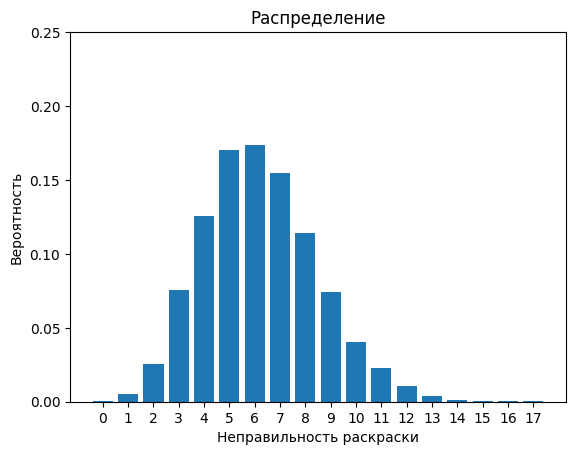

In [96]:
from collections import Counter

def monte_carlo(G: nx.Graph, n: int, A: int):
    results = [random_coloring_impropriety(G, n) for _ in range(A)]
    Ax = Counter(results)
    probabilities = {x: count / A for x, count in Ax.items()}
    return probabilities

def build_plot(probabilities):
    plt.bar(probabilities.keys(), probabilities.values())
    plt.xlabel('Неправильность раскраски')
    plt.ylabel('Вероятность')
    plt.title('Распределение')
    plt.xticks(sorted(probabilities.keys()))
    plt.yticks([k for k in np.arange(0, 0.3, 0.05)])
    plt.show()

cnt_verticies = 20
n = 5
G = nx.gnp_random_graph(cnt_verticies, 0.2)
A = 10000

distribution = monte_carlo(G, n, A)
build_plot(distribution)

_Задача_: пусть $G$ — дерево на $m$ вершинах, а количество цветов равно $2$. Найдите распределение неправильности в этом случае, т.е. для каждого возможного значения неправильности найдите вероятность достижения этого значения.

Рассмотрим дерево $G$ на $m$ вершинах. Так как это дерево, мы знаем, что оно имеет $m-1$ ребро. Давайте найдем вероятность того, что одно конкретное ребро будет неправильным(всего существует $2^2$ вариантов, и нас устраивает только 2 из них):

$$
P(\text{ребро неправильное}) = \frac{2}{4} = \frac{1}{2}
$$

В обратном случае, ребро правильное, то есть: $$P(\text{ребро правильное}) = 1 - \frac{1}{2} = \frac{1}{2}$$

Осталось заметить, что события (ребро правильное\неправильное) независимы в совокупности. Доказательство, например, по индукции, выберем произвольное подмножество ребер размера $k$, тогда добавив еще одно ребро вероятность пересечения будет равно вероятности, если бы мы просто перемножили(так, как наш граф это дерево, то добавление любого ребра уменьшает количество компонент на 1, а значит правильность "нового ребра" никак не зависит от правильности/неправильности предыдущих)

Тогда:
$$
P(\text{неправильность} = k) = \binom{m-1}{k} \left(\frac{1}{2}\right)^{k} \cdot \left(\frac{1}{2}\right)^{m - 1 - k} = \binom{m - 1}{k} \cdot \left(\frac{1}{2}\right)^{m - 1}, \quad \forall k=0,1,\dots, m-1.
$$


# Задание 2. Отношения (1.5 балла)
Нет, всё куда более прозаично. Хотя, возможно, не менее сложно.

Даны три конечных множества $K, M, N$ и бинарные отношения $A \subseteq K \times N$ и $B \subseteq K \times M$ на них. Требуется решить уравнение $A = X \circ B$, т.е. либо найти такое отношение $X \subseteq M \times N$, что $A = X \circ B$, либо проверить, что такого отношения нет.

_Задание_: реализуйте функцию `solve_binary_relation_equation`, которая принимает матрицы  $A \in M_{|K| \times |N|}(\mathbb{B})$ и $B \in M_{|K| \times |M|}(\mathbb{B})$, где $\mathbb{B} = \{ \texttt{False}, \texttt{True} \}$, задающие отношения $A$ и $B$ соответственно ($x A y$, если `A[x][y] == 1`). Функция должна вернуть матрицу $X \in M_{|M| \times |N|}(\mathbb{B})$, задающую отношение $X$, либо `None`, если решения не существует. Если решений несколько, можно вернуть любое.

_Условие на эффективность_: эта задача очень коротко решается с использованием булевых матричных операций. Напишите код таким образом, чтобы он не содержал явных циклов и занимал не более пяти строк кода. За нарушение этого ограничения будут сняты баллы.

In [97]:
import numpy as np

In [98]:
def solve_binary_relation_equation(A: np.ndarray, B: np.ndarray) -> np.ndarray | None:
    X = np.all(np.logical_or(~B[:, :, None], A[:, None, :]), axis=0)
    return X if np.array_equal(A, np.any(np.logical_and(B[:, :, None], X[None, :, :]), axis=1)) else None


Пример:
$$ K = \{ k_1, k_2 \}, M = \{ m_1, m_2 \}, N = \{ n_1, n_2, n_3 \} $$
$$ A = \{ (k_1, n_1), (k_1, n_3), (k_2, n_1) \}, B = \{ (k_1, m_1), (k_2, m_2) \} $$
Тогда единственное решение $A = X \circ B$ такое: $$X = \{ (m_1, n_1), (m_1, n_3), (m_2, n_1) \} $$

In [99]:
A = np.array([[True, False, True], [True, False, False]])
B = np.array([[True, False], [False, True]])
X = solve_binary_relation_equation(A, B)
assert np.array_equal(B @ X, A)

In [100]:
%%ipytest
import pytest

@pytest.mark.parametrize("A,B", [
    (np.eye(5, dtype=bool), np.eye(5, 6, dtype=bool)),
    (np.ones((3, 4), bool), np.ones((3, 1), bool)),
    (np.zeros((2, 3), bool), np.ones((2, 5), bool)),
    (
        np.array([[True, False], [True, True], [True, True]]),
        np.array([[False, True], [True, False], [True, True]])
    )
])
def test_solution_exists(A: np.ndarray, B: np.ndarray):
    X = solve_binary_relation_equation(A, B)
    assert X is not None
    assert X.dtype == bool
    assert np.array_equal(B @ X, A)


@pytest.mark.parametrize("A,B", [
    (np.eye(5, 7, dtype=bool), np.zeros((5, 8), bool)),
    (
        np.array([
            [False,  True, False, False],
            [ True,  True,  True, False],
            [False,  True,  True,  True]
        ]),
        np.array([
            [ True,  True,  True],
            [ True, False, False],
            [False,  True,  True]
        ])
    )
])
def test_no_solution(A: np.ndarray, B: np.ndarray):
    assert solve_binary_relation_equation(A, B) is None

......                                                                                       [100%]
6 passed in 0.31s


Обоснуйте корректность алгоритма.

_Обоснование_:

Наш алгоритм делает следующее: 
$$
X(m,n)=1 \quad\text{если} \ \ \forall k \ \ \text{верно, что} \ \ (!B(k,m) \vee A(k,n))
$$

После чего проверяет, что $A = X \circ B$, иначе выводит $\text{None}$

Докажем, что это верно:

Рассмотрим любой $X$ с условием, что $A = X \circ B$. Рассмотрим любое ребро $(m, n) \in X$, теперь возьмем произвольное $k \in K$, и заметим, что оно удовлетворяет $(!B(k,m) \vee A(k,n))$, то есть главное, чтобы не выполнялось что $B(k, m)$ есть, а $A(k, n)$, нет, так как по правому равенству путь есть, а по левому нет. И теперь осталось сказать, что если мы добавим в $X$ еще ребер с условием $X(m,n)=1 \quad\text{если} \ \ \forall k \ \ \text{верно, что} \ \ (!B(k,m) \vee A(k,n))$, то решение останется верным(противоречий не появится, а старые пути все также будут существовать). А значит, если решение существует, то наш алгоритм, действительно его находит, иначе выведет $\text{None}$.

# Задание 3. Производящие функции, Pythonic edition (2 балла)

В этом задании вам требуется написать класс производящей функции. Ниже приведен интерфейс класса. Все эти методы нужно реализовать. Еще ниже приведены тесты, которые можно и нужно запускать и смотреть.

Общая концепция: в классе хранится единственное поле `func`, которое возвращает коэффициенты последовательности. Все операции над производящими функциями делаются лениво. В реализации операций не надо копировать аргументы. Реализуйте операции таким образом, чтобы они сохраняли целочисленность производящей функции, в том числе в делении, если это возможно.

In [104]:
from typing import Callable, Iterable, Self, Sequence

Number = int | float

def safeDiv(numerator: Number, denominator: Number) -> Number:
    if isinstance(numerator, int) and isinstance(denominator, int) and numerator % denominator == 0:
        return numerator // denominator
    return numerator / denominator


class GeneratingFunction:
    __slots__ = ["func"]

    def __init__(self, func: Callable[[int], Number]):
        self.func = func

    @staticmethod
    def const(value: Number):
        """value + 0x + 0x² + ..."""
        return GeneratingFunction(lambda n: value if n == 0 else 0)

    @staticmethod
    def finite(values: Sequence[Number]):
        """values[0] + values[1]·x + ... + values[n]·xⁿ"""
        return GeneratingFunction(lambda n: values[n] if n < len(values) else 0)

    def __add__(self, other: Number | Self):
        if isinstance(other, Number):
            other = GeneratingFunction.const(other)
        return GeneratingFunction(lambda n: self.func(n) + other.func(n))

    def __radd__(self, other: Number):
        return self + other

    def __sub__(self, other: Number | Self):
        if isinstance(other, Number):
            other = GeneratingFunction.const(other)
        return self + -other

    def __rsub__(self, other: Number):
        return -self + other

    def __mul__(self, other: Number | Self):
        if (isinstance(other, Number)):
            return GeneratingFunction(lambda n: self.func(n) * other)
        def mul_coeff(n: int) -> Number:
            s = 0
            for i in range(n + 1):
                s += self.func(i) * other.func(n - i)
            return s
        return GeneratingFunction(mul_coeff)

    def __rmul__(self, other: Number):
        return self * other

    def __truediv__(self, other: Number | Self):
        if (isinstance(other, Number)):
            return GeneratingFunction(lambda n: safeDiv(self.func(n), other))
        b0 = other.func(0)
        if b0 == 0:
            raise ZeroDivisionError("b doesn't have b^{-1}!")
        
        cache: list[Number] = []
        def q(n: int) -> Number:
            while len(cache) <= n:
                m = len(cache)
                a_m = self.func(m)
                s = 0
                for i in range(1, m + 1):
                    s += other.func(i) * cache[m - i]
                cache.append(safeDiv(a_m - s, b0))
            return cache[n]
        return GeneratingFunction(q)

    def __rtruediv__(self, other: Number):
        return GeneratingFunction.const(other) / self

    def __pow__(self, pow: int):
        # Возведение в степень должно работать за O(log(abs(pow)))
        if pow < 0:
            self = GeneratingFunction.const(1) / self
            pow *= -1

        def bin_pow(a: Self, p: int) -> Self:
            if p == 0:
                return GeneratingFunction.const(1)
            if p % 2 == 0:
                temp = bin_pow(a, p // 2)
                return temp * temp
            return bin_pow(a, p - 1) * a

        return bin_pow(self, pow)

    def __neg__(self):
        return GeneratingFunction(lambda n: -self.func(n))

    def __getitem__(self, key: int) -> Number | list[Number]:
        if isinstance(key, slice):
            return list(map(self.func, range(*key.indices(key.stop))))
        return self.func(key)

    def __format__(self, format_spec: str) -> str:
        """
        Через `format_spec` можно указать, сколько первых членов ряда нужно вывести.
        Наример, `print(f"{fibb:4}")` выводит что-то типа "1 + 1x + 2x² + 3x³ + …".
        """
        # эта функция не проверяется в тестах
        # можно не убирать лишние знаки '-', единичные коэффиценты и пр.
        count = int(format_spec) if format_spec else 10

        terms = []
        for n in range(count):
            coeff = self.func(n)
            if coeff == 0:
                continue
            if n == 0:
                terms.append(f"{coeff}")
            elif n == 1:
                terms.append(f"{coeff}x")
            else:
                terms.append(f"{coeff}x^{n}")
        s = " + ".join(terms) if terms else "0"
        return s + " + …"

    def __str__(self) -> str:
        return f"{self}"

    def derivative(self):
        return GeneratingFunction(lambda n: (n + 1) * self.func(n + 1))

    def __iter__(self) -> Iterable[Number]:
        n = 0
        while True:
            yield self.func(n)
            n += 1

In [105]:
x = GeneratingFunction.finite([0, 1])
fibb_gen = -(x ** 2 + x - 1) ** -1
print(f"{fibb_gen:11}")
assert(fibb_gen[10] == 89)

1 + 1x + 2x^2 + 3x^3 + 5x^4 + 8x^5 + 13x^6 + 21x^7 + 34x^8 + 55x^9 + 89x^10 + …


In [106]:
%%ipytest
from itertools import islice

def fibb(n: int):
    a, b = 1, 1
    for _ in range(n):
        a, b = b, a + b
    return a


def test_init():
    assert list(islice(GeneratingFunction(lambda x: x * x), 5)) == [0, 1, 4, 9, 16]


def test_finite():
    assert (
        list(islice(GeneratingFunction.finite([2, 4, 1, 5]), 10))
        == [2, 4, 1, 5] + [0] * 6
    )

    coeffs = range(4)
    poly = GeneratingFunction.finite(coeffs)
    assert list(islice(poly, 5)) == [0, 1, 2, 3, 0]
    assert list(islice(poly, 3)) == [0, 1, 2]


def test_const():
    assert list(islice(GeneratingFunction.const(9), 3)) == [9, 0, 0]


def test_add():
    x = GeneratingFunction.finite([1, 2, 3, 4])
    y = GeneratingFunction.finite([6, 3, 1])
    z = GeneratingFunction(lambda i: i * i)
    assert (x + y)[:5] == [7, 5, 4, 4, 0]
    assert (x + y)[10**9] == 0
    assert (z + z)[10**9] == 2 * 10**18

    assert (z + 7)[:3] == [7, 1, 4]
    assert (42 + x)[:5] == [43, 2, 3, 4, 0]


def test_sub_neg():
    a = GeneratingFunction.finite([1, 2, 3, 4])
    assert (-a)[:5] == [-1, -2, -3, -4, 0]
    assert (a - a)[:100] == [0] * 100
    assert (a - 42)[:5] == [-41, 2, 3, 4, 0]
    assert (57 - a)[:5] == [56, -2, -3, -4, 0]

    b = GeneratingFunction(lambda n: n * 9)
    assert (a - b)[10**9] == -9 * 10**9


def test_mul():
    x = GeneratingFunction.finite([0, 1])
    x2 = x * x
    poly1 = 3 * x2 - x**3 - 4
    poly2 = x * 2 + 5
    assert (poly1 * poly2)[:5] == [-20, -8, 15, 1, -2]

    f = GeneratingFunction(fibb)
    assert (-f * (x**2 + x - 1))[:100] == [1] + [0] * 99


def test_div():
    x = GeneratingFunction.finite([0, 1])
    f = -1 / (x**2 + x - 1)
    assert isinstance(f[10], int)
    assert (-1 / (x**2 + x - 1))[:100] == GeneratingFunction(fibb)[:100]
    assert (x / GeneratingFunction(fibb))[:100] == (-(x**3) - x**2 + x)[:100]
    assert isinstance((x / 1)[10], int)
    assert isinstance((f / -1)[10], int)
    assert (x / (2 * x + 2))[1] == 0.5

    assert (
        (-GeneratingFunction(fibb) ** -3)[:10]
        == ((x**2 + x - 1) ** 3)[:10]
        == [-1, 3, 0, -5, 0, 3, 1, 0, 0, 0]
    )


def test_derivative():
    x = GeneratingFunction.finite([0, 1])
    f = 1 / (1 - x)
    assert f.derivative()[:10] == list(range(1, 11))

    g = GeneratingFunction(fibb)
    assert (f * g).derivative()[:10] == (f.derivative() * g + g.derivative() * f)[:10]

........                                                                                     [100%]
8 passed in 13.38s
